In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path="/content/drive/MyDrive/cdac assignment/project/dataset/TravelInsurancePrediction.csv"
df=pd.read_csv(file_path,index_col = 0)

**Pre Processing**

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.shape

(1987, 9)

In [ ]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

**Descriptive Analysis**

In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


**Checking if any column has null values**

In [ ]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**Number of Unique Values**

In [ ]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [ ]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

**Observations:**
*   In this dataset no column has na values
*    Also no column has only one unique value. So no need to drop any column.



**Total columns = 9**

*    6 categorical columns :Employment Type, GraduateOrNot, ChronicDiseases,    FrequentFlyer, EverTravelledAbroad, TravelInsurance.

*   3 continuous columns :Age, AnnualIncome, FamilyMembers.   
    
        


In [ ]:
column_object=df.select_dtypes(include='object').columns
column_object

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**Outlier Detection**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7d319c237520>,
 'caps': [<matplotlib.lines.Line2D at 0x7d319c2379a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d319ce9add0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d319c237ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d319c27c1c0>],
 'means': []}

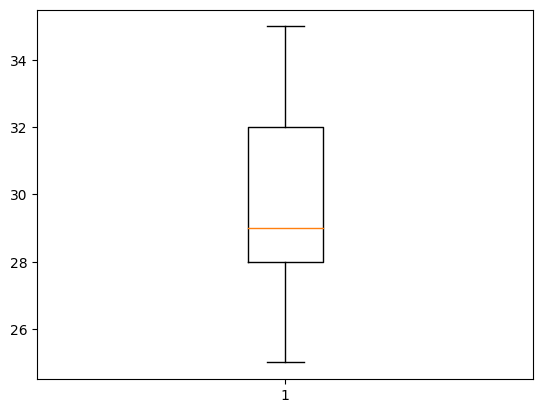

In [ ]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d319a13e230>,
 'caps': [<matplotlib.lines.Line2D at 0x7d319a13e650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d319a13df90>],
 'medians': [<matplotlib.lines.Line2D at 0x7d319a13eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d319a13ee30>],
 'means': []}

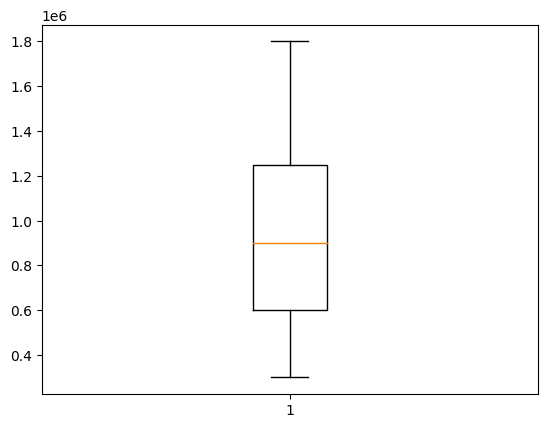

In [ ]:
plt.boxplot(df['AnnualIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d3199fc63b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d3199fc68f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d3199fc6110>],
 'medians': [<matplotlib.lines.Line2D at 0x7d3199fc6e30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d3199fc70d0>],
 'means': []}

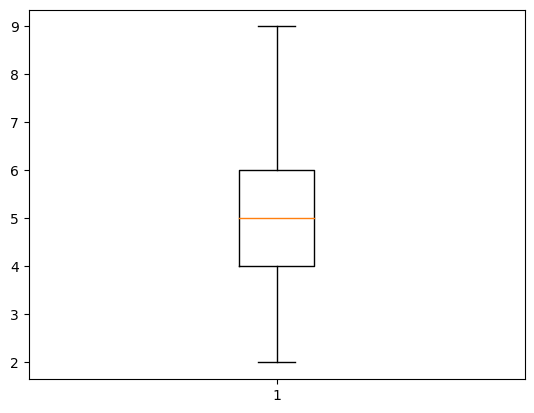

In [ ]:
plt.boxplot(df['FamilyMembers'])

In [ ]:
numeric_columns = ['Age','AnnualIncome','FamilyMembers']

In [ ]:
df_new=df.copy()

In [ ]:
def outlier_imputation_IQR(df,col):
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1

    df.loc[df[col] < (q1-1.5*iqr),col ] = (q1-1.5*iqr)
    df.loc[df[col] > (q3+1.5*iqr),col ] = (q3+1.5*iqr)
    return df

for col in numeric_columns:
    df_new = outlier_imputation_IQR(df_new,col)

df_new.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


**Observations:**

*   No outliers in Age, AnnualIncome, FamilyMembers columns.
